In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter

##AUTOR: ALDO MUÑOZ ZECUA

#Procesamiento de datos

In [ ]:
data=pd.read_csv("application_data.csv")

In [ ]:
lista=data.isnull().sum().sort_values(ascending=False)

In [ ]:
#Eliminar columnas con valores nulos mayores 0 igual a 41519
for columna in data.columns:
  if(data[columna].isnull().sum())>41519:
    data=data.drop(columna, axis=1)

In [ ]:
np.array(lista).T

array([214865, 214865, 214865, 213514, 213514, 213514, 210295, 210199,
       210199, 210199, 208642, 208642, 208642, 204488, 204488, 204488,
       202929, 182590, 182590, 182590, 179943, 179943, 179943, 173378,
       169682, 169682, 169682, 163891, 163891, 163891, 156341, 156061,
       156061, 156061, 154828, 154828, 154828, 154350, 154350, 154350,
       154297, 153020, 153020, 153020, 150007, 150007, 150007, 148431,
       145755,  96391,  60965,  41519,  41519,  41519,  41519,  41519,
        41519,   1292,   1021,   1021,   1021,   1021,    660,    278,
           12,      2,      1,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [ ]:
data.isnull().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
                               ...  
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
TARGET                             0
REG_CITY_NOT_LIVE_CITY             0
Length: 71, dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_encoder = LabelEncoder()
for columna in data.columns:
  if(data[columna].dtype)==object:
   data[columna] = label_encoder.fit_transform(data[columna])

In [ ]:
data=data.abs()

In [ ]:
#Extraemos los datos en una matriz
X=data.iloc[:,2:].values

In [ ]:
#Verificamos si los datos estan equilibrados
data["TARGET"].value_counts()

0    243016
1     20407
Name: TARGET, dtype: int64

In [ ]:
y=data["TARGET"].values

In [ ]:
#Equilibrar los datos
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.5)

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)
Counter(y)

Counter({0: 204070, 1: 102035})

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

##PCA

In [ ]:
pca = PCA()
pca.fit(X_train_std)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(n_components)

47


#Regresion Logistica

In [ ]:
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=n_components),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train,y_train)
y_pred= pipe_lr.predict(X_test)
print(f'Exactitud en test: {pipe_lr.score(X_test,y_test):.3f}')

Exactitud en test: 0.689


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Metricas
print(f'Precision: {precision_score(y_test,y_pred):.3f}')
print(f'    Recal: {recall_score(y_test,y_pred):.3f}')
print(f'        F1: {f1_score(y_test,y_pred)}')

Precision: 0.568
    Recal: 0.281
        F1: 0.375889081910256


[[36446  4368]
 [14673  5734]]


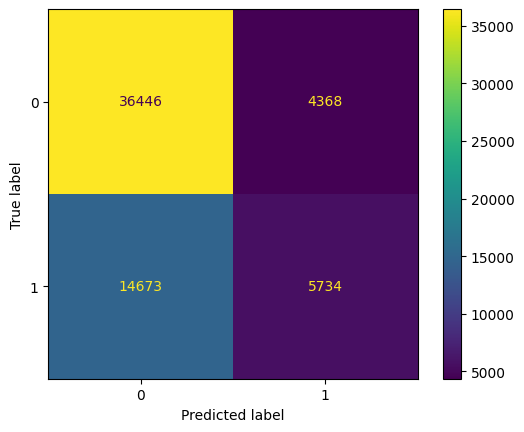

In [ ]:
#Matriz de confusion
confmat = confusion_matrix(y_test,y_pred)
print(confmat)
ConfusionMatrixDisplay(confmat).plot()

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train) ## del conjunto de entrenamiento lo dividimos en 10
scores = []

for k, (train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)
  print(f'Pliegue {k+1}: Dist/clase : {np.bincount(y_train[train]) }, Acc: {score:.3f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pliegue 1: Dist/clase : [146930  73465], Acc: 0.686
Pliegue 2: Dist/clase : [146930  73465], Acc: 0.691
Pliegue 3: Dist/clase : [146930  73465], Acc: 0.690
Pliegue 4: Dist/clase : [146930  73465], Acc: 0.689


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pliegue 5: Dist/clase : [146930  73466], Acc: 0.687


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pliegue 6: Dist/clase : [146930  73466], Acc: 0.688
Pliegue 7: Dist/clase : [146931  73465], Acc: 0.687


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pliegue 8: Dist/clase : [146931  73465], Acc: 0.687


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pliegue 9: Dist/clase : [146931  73465], Acc: 0.688
Pliegue 10: Dist/clase : [146931  73465], Acc: 0.687


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f'Exactitud de CV: {np.mean(scores):.3f} +- {np.std(scores):.3f}')

Exactitud de CV: 0.688 +- 0.001


In [ ]:
print('Puntajes de CV: %s' % (scores))
print('Exactitud de CV %.3f +- %.3f' % (np.mean(scores), np.std(scores)))

Puntajes de CV: [0.6862673036873699, 0.690677447017028, 0.6897790844869125, 0.6894115725427743, 0.6866628552760535, 0.6878062724599804, 0.6871120548840248, 0.6870712185560275, 0.6876020908199935, 0.6873570728520092]
Exactitud de CV 0.688 +- 0.001


#XGBoost

In [ ]:
pipe_xb = make_pipeline(StandardScaler(),
                        XGBClassifier())
pipe_xb.fit(X_train,y_train)
y_pred= pipe_xb.predict(X_test)
print(f'Exactitud en test: {pipe_xb.score(X_test,y_test):.3f}')

Exactitud en test: 0.933


In [ ]:
#Metricas
print(f'Precision: {precision_score(y_test,y_pred):.3f}')
print(f'    Recal: {recall_score(y_test,y_pred):.3f}')
print(f'        F1: {f1_score(y_test,y_pred)}')

Precision: 0.994
    Recal: 0.802
        F1: 0.8881596789065466


[[40722    92]
 [ 4032 16375]]


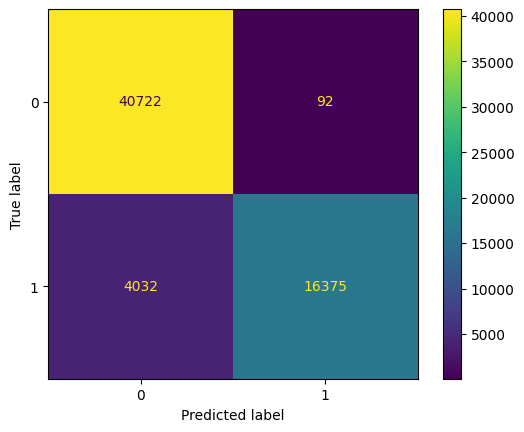

In [ ]:
#Matriz de confusion
confmat = confusion_matrix(y_test,y_pred)
print(confmat)
ConfusionMatrixDisplay(confmat).plot()

#Arbol de decision

In [ ]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
                  scoring='accuracy',cv=2)
scores = cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)

In [ ]:
gs.fit(X_train, y_train)
y_pred_test = gs.predict(X_test)

In [ ]:
print(f'Exactitud de NVC en DT: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

Exactitud de NVC en DT: 0.880 +/- 0.005


In [ ]:
#Metricas
print(f'Precision: {precision_score(y_test,y_pred_test):.3f}')
print(f'    Recal: {recall_score(y_test,y_pred_test):.3f}')
print(f'        F1: {f1_score(y_test,y_pred_test)}')

Precision: 0.977
    Recal: 0.645
        F1: 0.7766692248656946


[[40499   315]
 [ 7251 13156]]


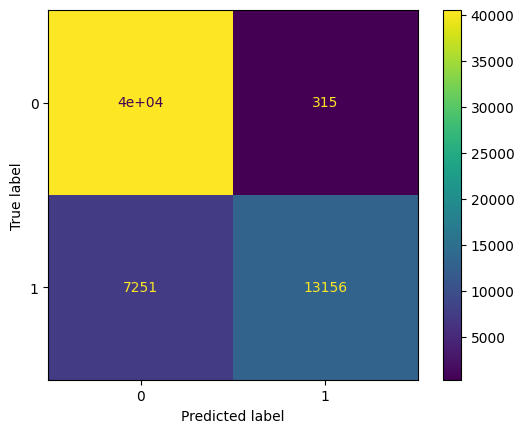

In [ ]:
#Matriz de confusion
confmat = confusion_matrix(y_test,y_pred_test)
print(confmat)
ConfusionMatrixDisplay(confmat).plot()

#K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipe_lr = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=3))
pipe_lr.fit(X_train,y_train)
y_pred= pipe_lr.predict(X_test)
print(f'Exactitud en test: {pipe_lr.score(X_test,y_test):.3f}')

Exactitud en test: 0.857


In [ ]:
#Metricas
print(f'Precision: {precision_score(y_test,y_pred):.3f}')
print(f'    Recal: {recall_score(y_test,y_pred):.3f}')
print(f'        F1: {f1_score(y_test,y_pred)}')

Precision: 0.719
    Recal: 0.936
        F1: 0.8132382675321911


[[33341  7473]
 [ 1302 19105]]


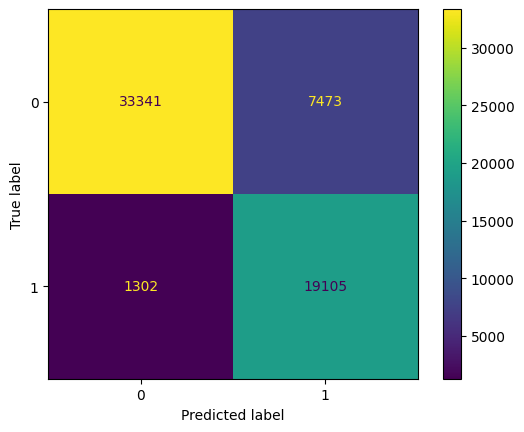

In [ ]:
#Matriz de confusion
confmat = confusion_matrix(y_test,y_pred)
print(confmat)
ConfusionMatrixDisplay(confmat).plot()